In [ ]:
#ANALISIS DE CORRELACION

#12
#ANALISIS DE CORRELACION
# CORRELACION Seleccionar solo las columnas numéricas
columnas =  ['ImpuestoId','Activo','CuentaContableCodigo','SubRubroCodigo','RubroCodigo','SubclasificacionCodigo','ClasificacionCodigo','UnidadCodigo'
            ,'Stock','PrecioVenta','MovimientosStock','MovimientoCantidad']


data_seleccionada = data[columnas]

In [ ]:
#HICE ESTO
# Reemplazar las comas por puntos en las columnas relevantes
#data[columnas] = data[columnas].str.replace(',', '.', regex=False)
# Convertir la columna a tipo numérico
#data[columnas] = pd.to_numeric(data[columnas], errors='coerce')

In [126]:
# Calcular la matriz de correlación

corr_matrix = data_seleccionada.corr()

# Imprimir la matriz de correlación
print(corr_matrix)
# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='vlag_r', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()


ValueError: could not convert string to float: '3760,59'

In [8]:
#14
#Vamos a agregar una nueva variable para descripcion
# Crear la nueva columna 'TieneDescripcion' basada en si 'descripcion' tiene valores nulos o no
data['TieneDescripcion'] = np.where(data['Descripcion'].isnull(), 0, 1)

# Verificar el resultado
print(data[['Descripcion', 'TieneDescripcion']])

                                        Descripcion  TieneDescripcion
0                             BATERIAS DE VEHICULOS                 1
1             MATERIALES PARA EL AREA DE PRODUCCION                 1
2                                               NaN                 0
3                      COMBUSTIBLES Y LUBRINCANTES.                 1
4                                               NaN                 0
...                                             ...               ...
3903  relojes digitales para Donacion TK 21216/2024                 1
3904                                            NaN                 0
3905                                            NaN                 0
3906                                            NaN                 0
3907                                            NaN                 0

[3908 rows x 2 columns]


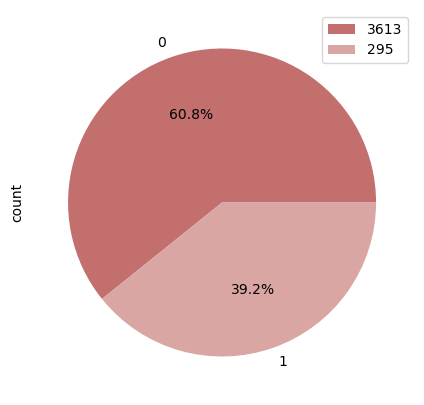

In [10]:
#14
# Se muestra el porcentaje de la muestra para cada una de los dos valores TieneDescipcion
#AGREGADO A LA TESIS
import seaborn as sns
color=sns.color_palette("vlag_r")
data['TieneDescripcion'].value_counts().plot(kind='pie',colors=color,autopct='%1.1f%%',figsize=(5,5))
plt.show
varValue = data.Activo.value_counts()
plt.legend(list(varValue))
plt.show()

In [112]:
#15
#COmprobación de chi cuadrada - 
tabla_contingencia = pd.crosstab(data['Clasificacion'], data['Subclasificacion'])
print(tabla_contingencia)

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print(f"Estadístico Chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
print(f"Grados de libertad: {dof}")

Subclasificacion                      ACERO  COBRE  COSTOS PERSONAL  DISCOS  \
Clasificacion                                                                 
BIENES E INSUMOS MATERIALES               0      0                0       0   
CABLES Y ENERGÍA                          4    230                0       0   
DESARROLLO DE SOFTWARE                    0      0                0       0   
EQUIPAMIENTO DE REDES/COMUNICACIONES      0      0                0       0   
HERRAMIENTAS                              0      0                0      12   
LICENCIAS, DERECHOS Y SUSCRIPCIONES       0      0                0       0   
RAE                                       0      0                0       0   
RRHH                                      0      0               25       0   
SERVICIOS GENERALES                       0      0                0       0   

Subclasificacion                      ELECTRÓNICAS  ELÉCTRICAS  ENERGÍA  \
Clasificacion                                          

In [145]:
#analisi de NUEVAS COMBINACIONES
data['ClasificacionCompleta'] = data['Clasificacion'] + ' - ' + data['Subclasificacion'] + ' - ' + data['Rubro'] + ' - ' + data['SubRubro']
#data['ClasificacionCompletaCod'] =  data['SubclasificacionCodigo'] + ' - ' + data['RubroCodigo'] + ' - ' + data['SubRubrCodigo']
data['InformacionFinanciera'] = data['CuentaContableCodigo'].astype(str) + '-' + data['ImpuestoId'].astype(str) + '-' + data['PrecioVenta'].astype(str)

#Combinación "Unidad de Medida y Impuesto"
data['UnidadImpuesto'] = data['Unidad'] + ' - ' + data['Impuesto']

#data['DesempenoInventario'] = (data['MovimientosStock'] / (data['Stock'] + 1)) * data['ImporteCompra'].astype(float)
#data['PrecioStockRatio'] = data['PrecioVenta'].astype(float) / (data['Stock'] + 1)  # Evitar división por 0

data['ClasificacionDescripcion'] = data['Clasificacion'] + ' - ' + data['Descripcion'].fillna('')

data['ActivoPrecio'] = data['Activo'].astype(str) + '-' + data['PrecioVenta'].astype(str)
data['ActivoPrecio'] = data['Activo'].astype(str) 

In [398]:
#Vuelvo a calcular la matriz de corre
columnas =  ['ImpuestoId','CuentaContableCodigo','SubRubroCodigo','RubroCodigo','SubclasificacionCodigo','ClasificacionCodigo','UnidadCodigo'
            ,'Stock','PrecioVenta','MovimientosStock','MovimientoCantidad']

#data_numeric = data.select_dtypes(include=[int, float])
data_seleccionada = data[columnas]
# Calcular la matriz de correlación

corr_matrix = data_seleccionada.corr()

# Imprimir la matriz de correlación
print(corr_matrix)
# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='vlag_r', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()

KeyError: "['ImpuestoId', 'CuentaContableCodigo', 'UnidadCodigo', 'PrecioVenta', 'MovimientosStock', 'MovimientoCantidad'] not in index"

                          Activo  CuentaContableCodigo  SubRubroCodigo  \
Activo                  1.000000             -0.009959        0.005726   
CuentaContableCodigo   -0.009959              1.000000       -0.019850   
SubRubroCodigo          0.005726             -0.019850        1.000000   
RubroCodigo            -0.003414              0.031315        0.774409   
SubclasificacionCodigo -0.032991              0.082962        0.638913   
ClasificacionCodigo    -0.015476              0.040217        0.602756   
TieneDescripcion       -0.040232             -0.038052       -0.067327   

                        RubroCodigo  SubclasificacionCodigo  \
Activo                    -0.003414               -0.032991   
CuentaContableCodigo       0.031315                0.082962   
SubRubroCodigo             0.774409                0.638913   
RubroCodigo                1.000000                0.824171   
SubclasificacionCodigo     0.824171                1.000000   
ClasificacionCodigo        0.

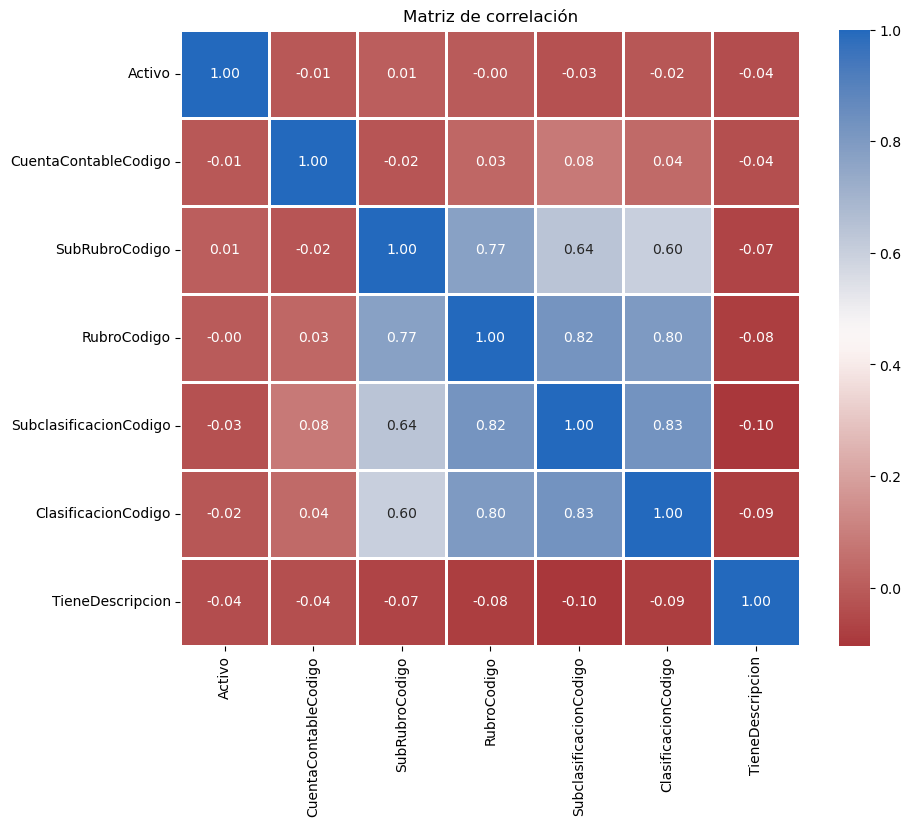

In [95]:
#ANALISIS DE CORRELACION
#Vuelvo a calcular la matriz de corre

columnas =  ['Activo','CuentaContableCodigo','SubRubroCodigo','RubroCodigo','SubclasificacionCodigo','ClasificacionCodigo','TieneDescripcion']
#data_numeric = data.select_dtypes(include=[int, float])
data_seleccionada = data[columnas]
# Calculo la matriz de correlación

corr_matrix = data_seleccionada.corr()

print(corr_matrix)
# Visualizo
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True,linecolor='white', linewidths=1,cmap='vlag_r', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()